In [1]:
import math
import numpy as np
import pandas as pd
import cv2

import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils
from sklearn.utils import shuffle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
link='/content/drive/MyDrive/emotion/train.csv'

In [5]:
df=pd.read_csv(link)
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [6]:
df.shape

(28709, 2)

In [7]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

We have 7 emotions here:

0: anger

1: disgust

2: fear

3: happiness

4: sadness

5: surprise

6: neutral

In [8]:
emotion_label={0:'Anger', 1:'Disgust', 2:'Fear', 3: 'Happiness', 4: 'Sadness', 5: 'Surprise', 6:'Neutral'}

In [10]:
df.emotion.value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


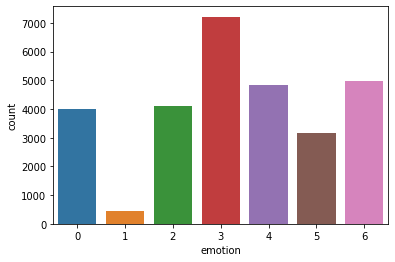

In [11]:
sns.countplot(df.emotion)
plt.show()

In [12]:
d_0=df[df['emotion']==0]
d_2=df[df['emotion']==2][:4000]
d_3=df[df['emotion']==3][:4000]
d_4=df[df['emotion']==4][:4000]
d_5=df[df['emotion']==5]
d_6=df[df['emotion']==6][:4000]

In [13]:
frames=[d_0,d_2, d_3,d_4,d_5,d_6]
df=pd.concat(frames)
df=shuffle(df)
df.head()

,emotion,pixels
26968,5,67 62 63 69 75 72 49 35 49 71 73 46 51 105 120...
1031,4,31 37 55 71 55 44 90 149 156 154 155 157 160 1...
14994,3,252 252 253 252 251 255 198 121 106 107 105 12...
15429,4,31 23 21 24 17 43 49 61 70 64 61 66 68 69 64 4...
15196,4,1 0 0 0 0 0 5 40 56 57 65 81 97 105 128 152 16...


df is our working dataset. We removed extra happiness emotion and disgust so it dosen't act as noise to others.